## Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

## Import LIbrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## 1. Basic EDA

In [2]:
data=pd.read_csv('Company_Data.csv')
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.duplicated().drop_duplicates()

0    False
dtype: bool

In [7]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
category_features = data.select_dtypes(include=['object', 'bool']).columns.values
print('category_features :' ,category_features ,'\n')

category_features : ['ShelveLoc' 'Urban' 'US'] 



In [9]:
for columns in category_features:
    print(columns,'--',len(data[columns].unique()),'values:\n',data[columns].value_counts())

ShelveLoc -- 3 values:
 Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Urban -- 2 values:
 Yes    282
No     118
Name: Urban, dtype: int64
US -- 2 values:
 Yes    258
No     142
Name: US, dtype: int64


In [10]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

Text(0.5, 1.0, ' The quality of the shelving location for the car seats at each site ')

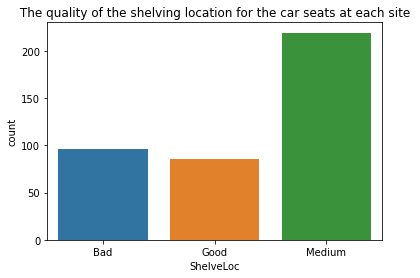

In [11]:
sns.countplot('ShelveLoc',data=data)
plt.title(' The quality of the shelving location for the car seats at each site ')

In [12]:
data[('Urban')].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

Text(0.5, 1.0, ' The store is in an urban or rural location ')

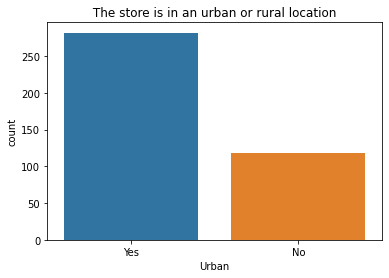

In [13]:
sns.countplot('Urban',data=data)
plt.title(' The store is in an urban or rural location ')

Text(0.5, 1.0, 'The store is in the US or not')

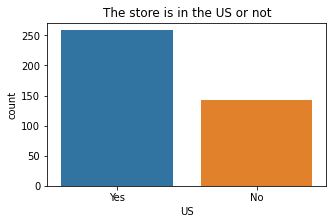

In [14]:
plt.figure(figsize=(5,3))
sns.countplot('US',data=data)
plt.title('The store is in the US or not')

In [15]:
data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

<Figure size 864x576 with 0 Axes>

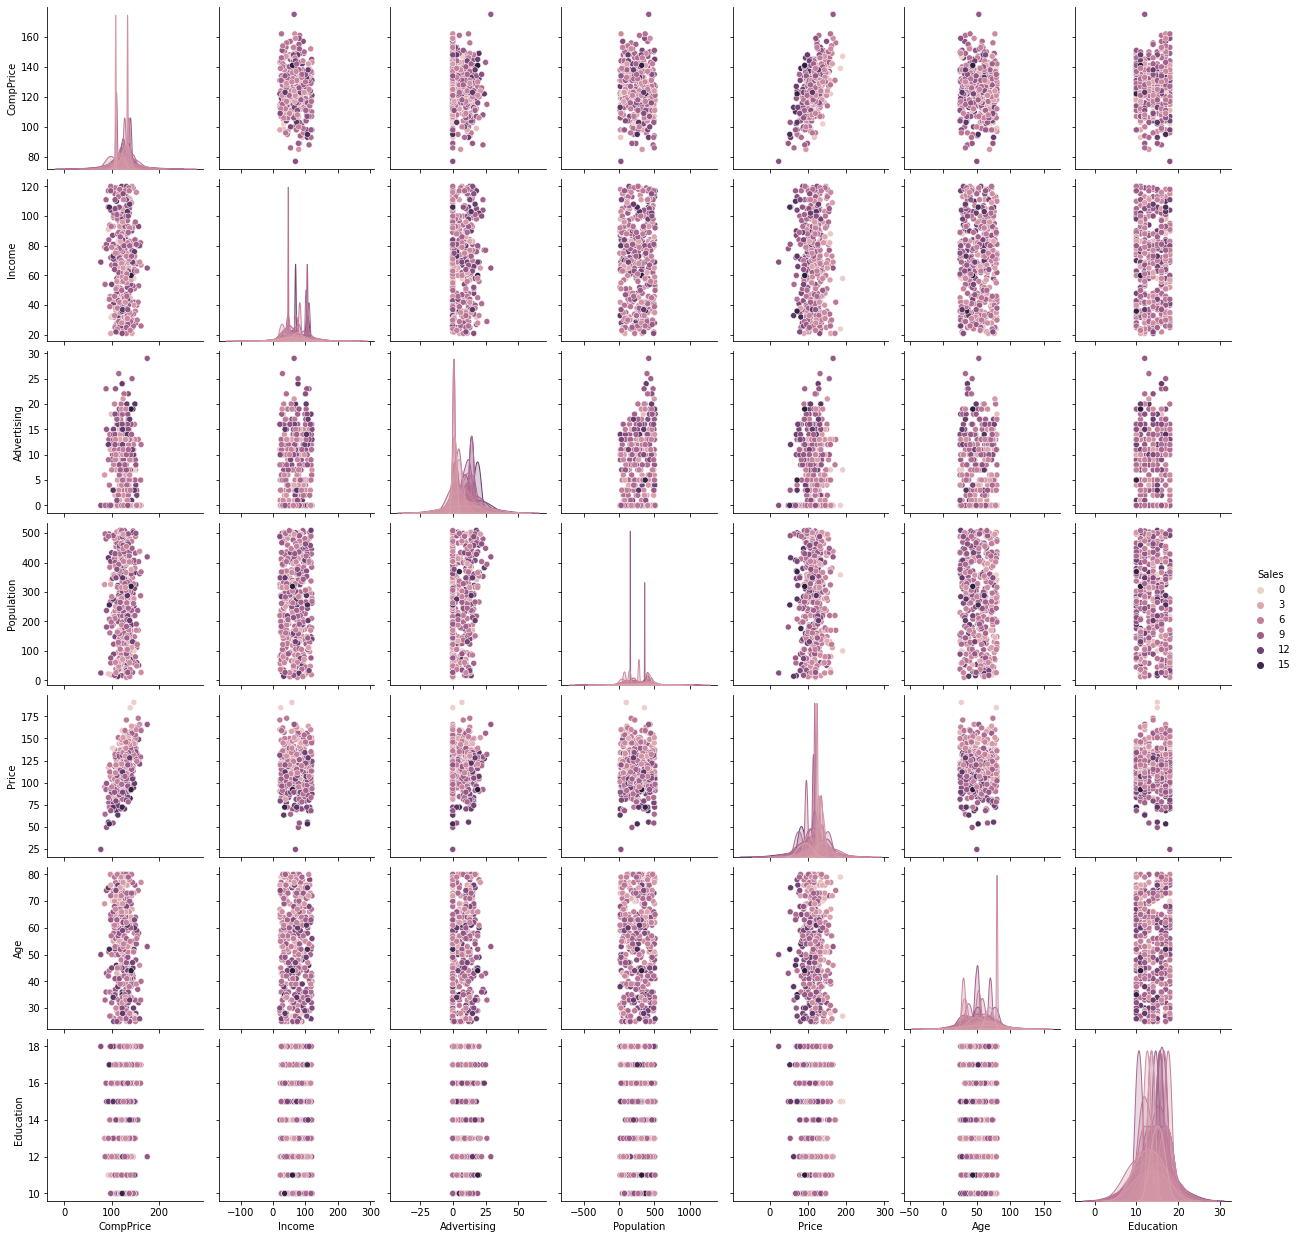

In [16]:
plt.figure(figsize=(12,8))
sns.pairplot(data,hue='Sales')

In [17]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


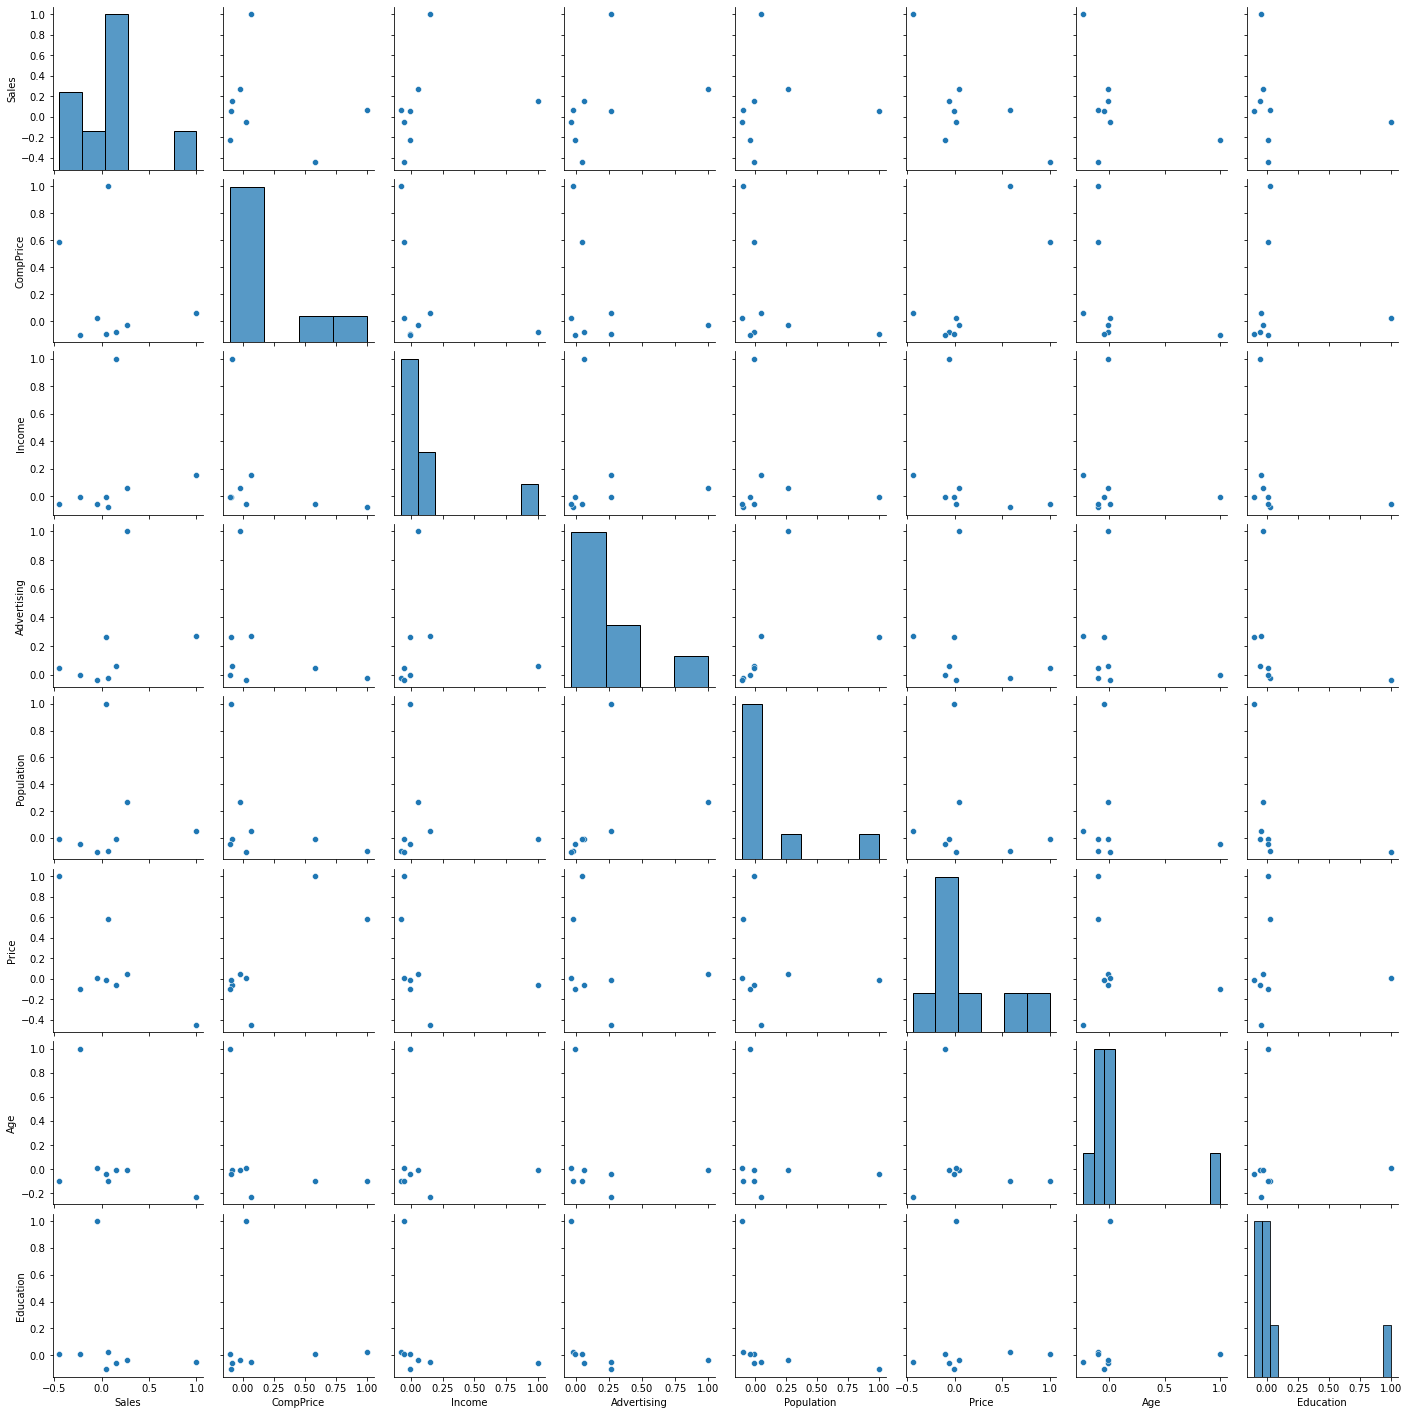

In [18]:
sns.pairplot(data.corr())

<AxesSubplot:>

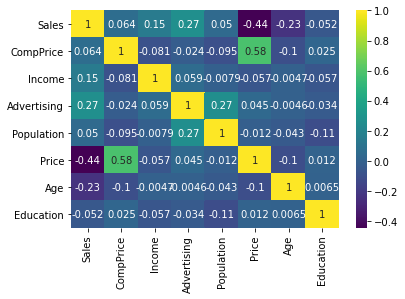

In [19]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [20]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<AxesSubplot:xlabel='CompPrice', ylabel='Sales'>

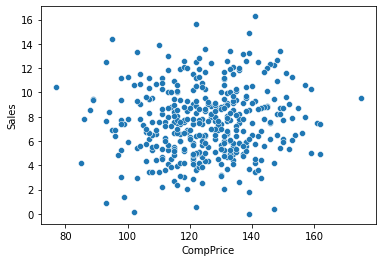

In [21]:
sns.scatterplot(x='CompPrice',y='Sales',data=data)

## create dummy for caterigorical data

In [22]:
data2 = data.copy()

In [23]:
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [24]:
data2 = pd.get_dummies(data2, columns = ['ShelveLoc','Urban','US'],drop_first=True)

In [25]:
data2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [26]:
data2['ShelveLoc_Good'].value_counts()

0    315
1     85
Name: ShelveLoc_Good, dtype: int64

In [27]:
data2['ShelveLoc_Medium'].unique()

array([0, 1], dtype=uint8)

## converting Target variable 'Sales' into categories Low, Medium and High.


In [28]:
data2['Sales'] = pd.cut(x=data2['Sales'],bins=[0, 6, 12,22], labels=['Low' ,'Medium','High'],right=False)
                        
                                                                      
data2['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

<AxesSubplot:xlabel='Sales', ylabel='count'>

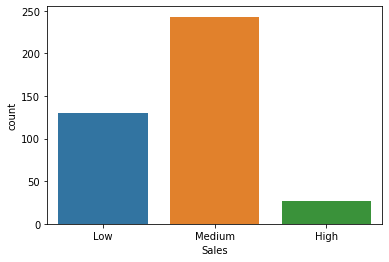

In [29]:
sns.countplot('Sales',data=data2)

## Taking the input and output values in form of X and Y

In [31]:
x= data2.drop('Sales',axis=1)
y= data2[['Sales']]

In [32]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [33]:
y

,Sales
0,Medium
1,Medium
2,Medium
3,Medium
4,Low
...,...
395,High
396,Medium
397,Medium
398,Low


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=120)

In [42]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((280, 11), (280, 1), (120, 11), (120, 1))

## Model training

In [43]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth = 3)

In [45]:
%%time
dt_model.fit(x_train,y_train)


Wall time: 6.98 ms


DecisionTreeClassifier(max_depth=3)

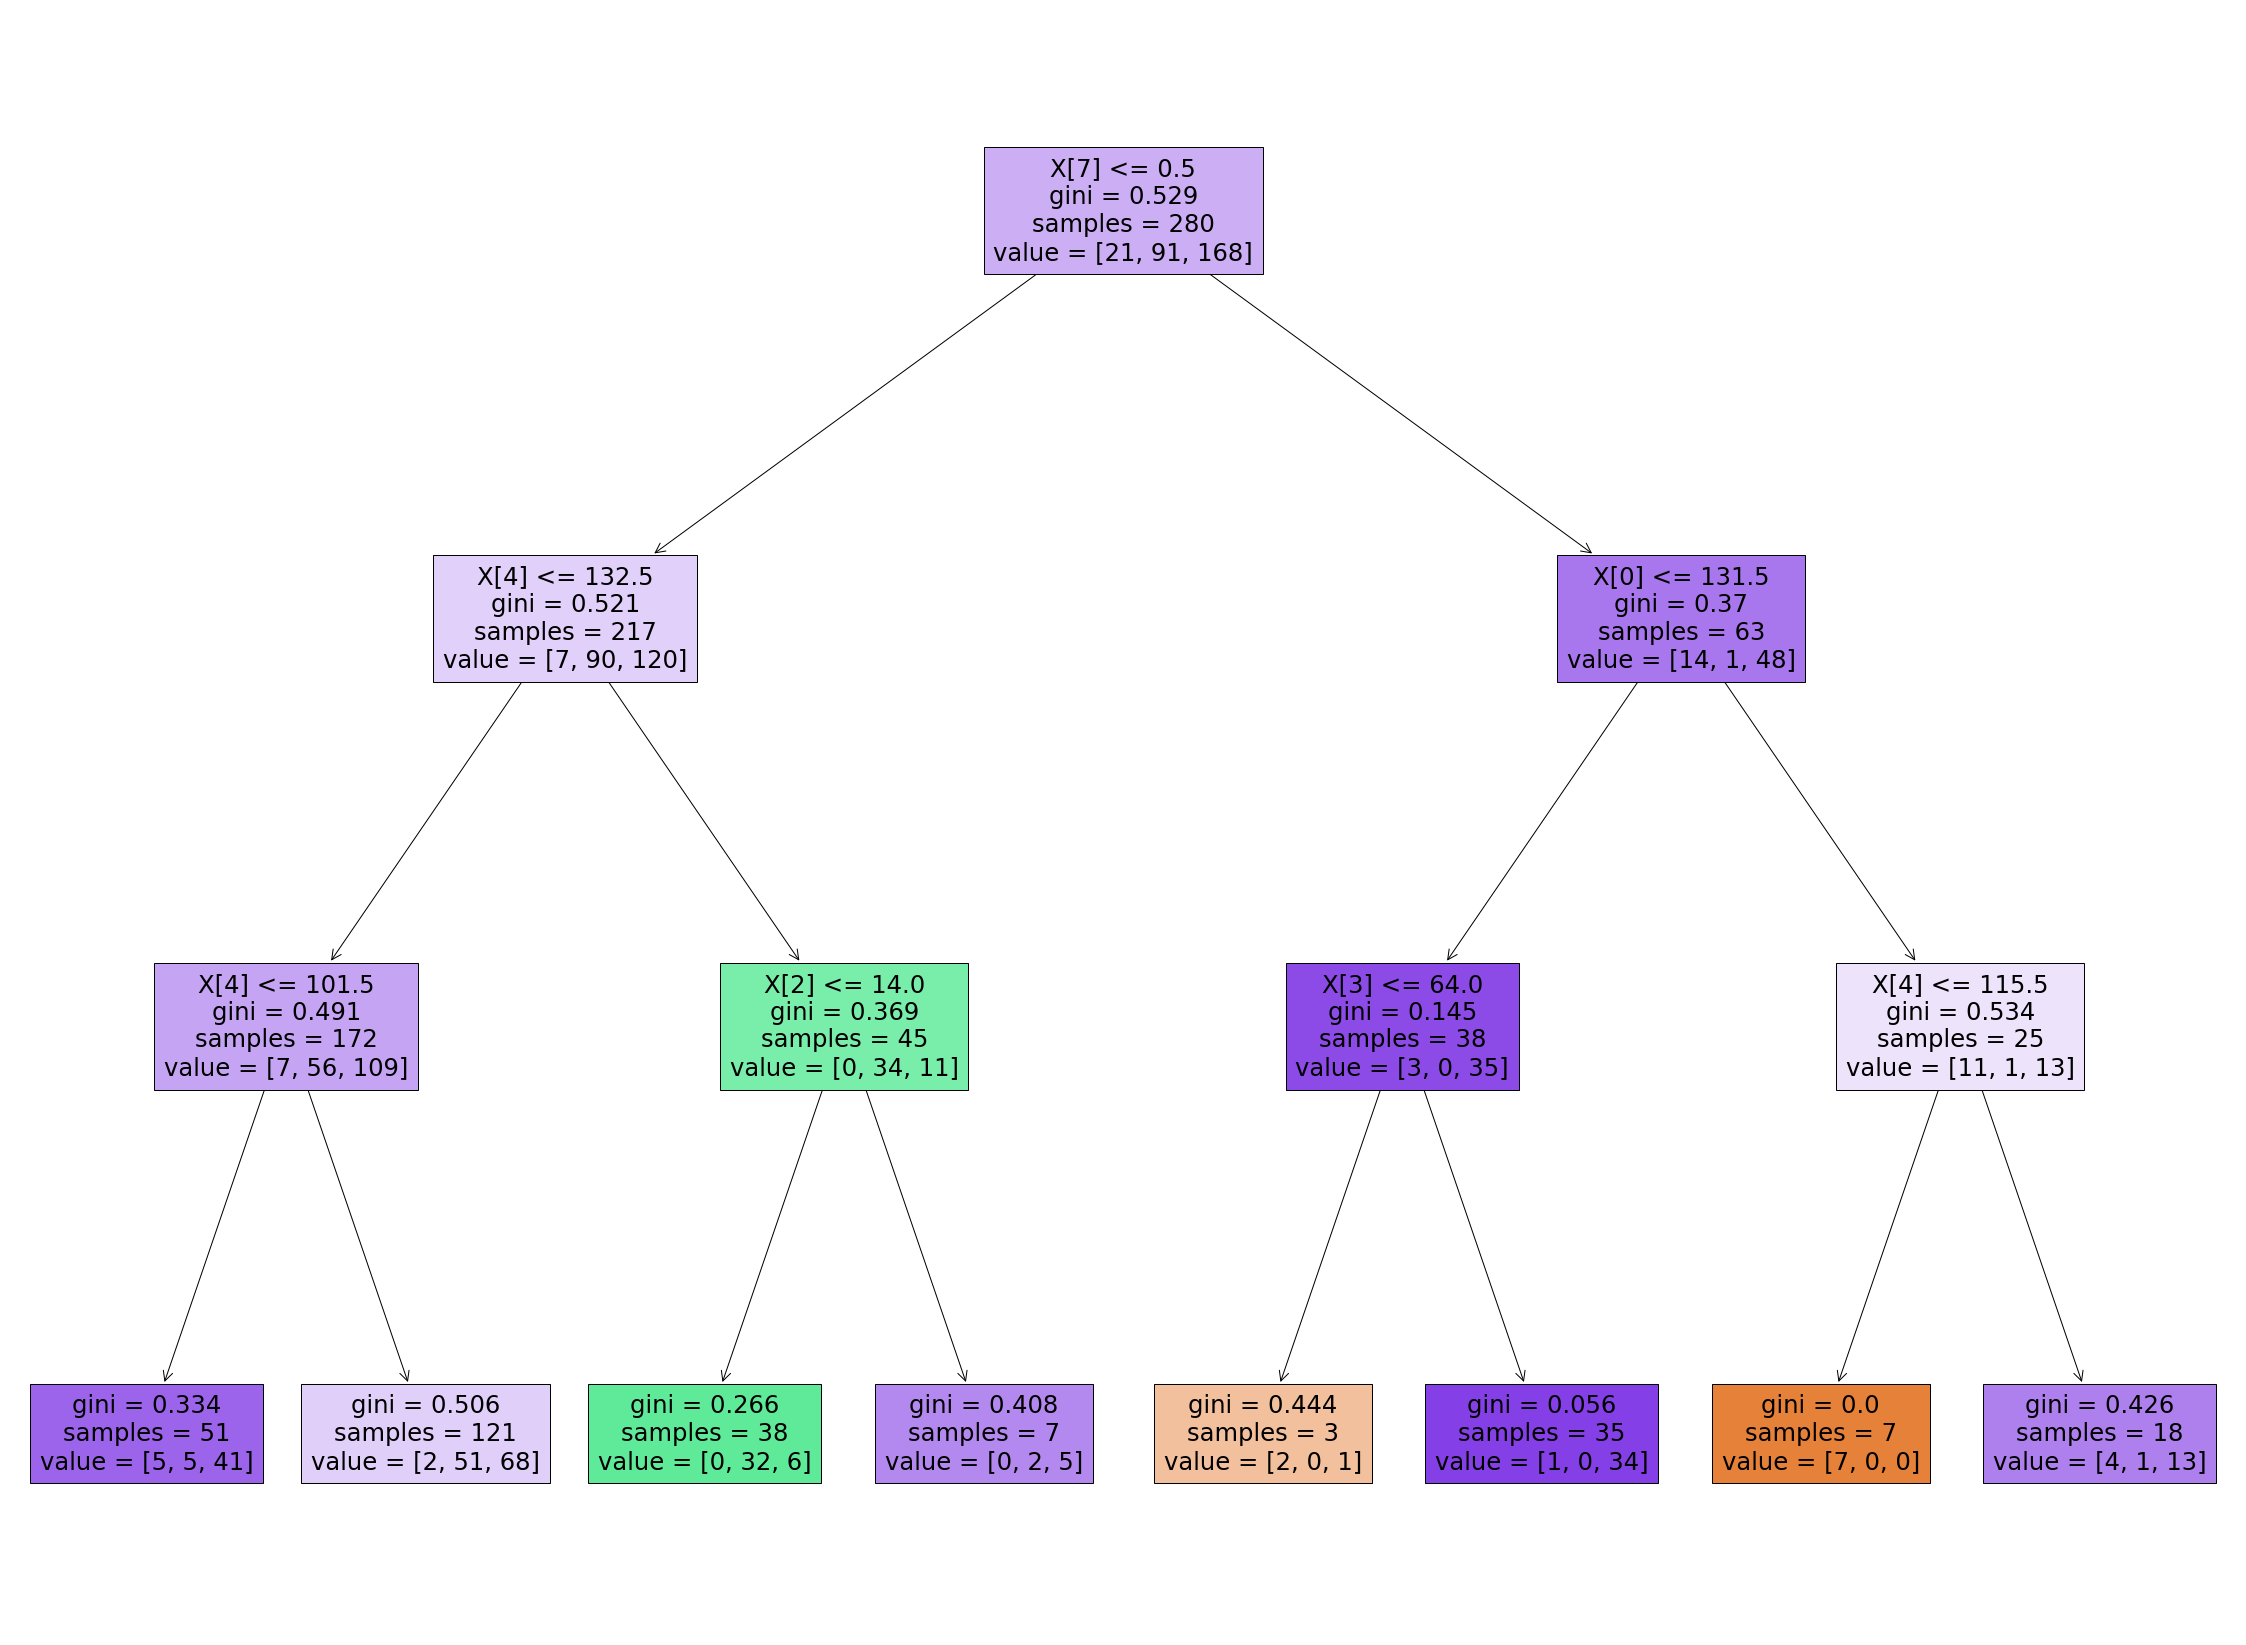

In [46]:
plt.figure(figsize=(40,30))
plot_tree(decision_tree = dt_model,filled=True,proportion=False)

plt.show()

## BY using Gridsearch cv for best Hyperparameter

In [47]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['gini','entropy'],
                                         'max_depth':[3,4,5,6,7,8,9]},
                           cv = 5)
grid_search.fit(x,y)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [48]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth = 6)

In [49]:
%%time
dt_model.fit(x_train,y_train)

Wall time: 9.93 ms


DecisionTreeClassifier(max_depth=6)

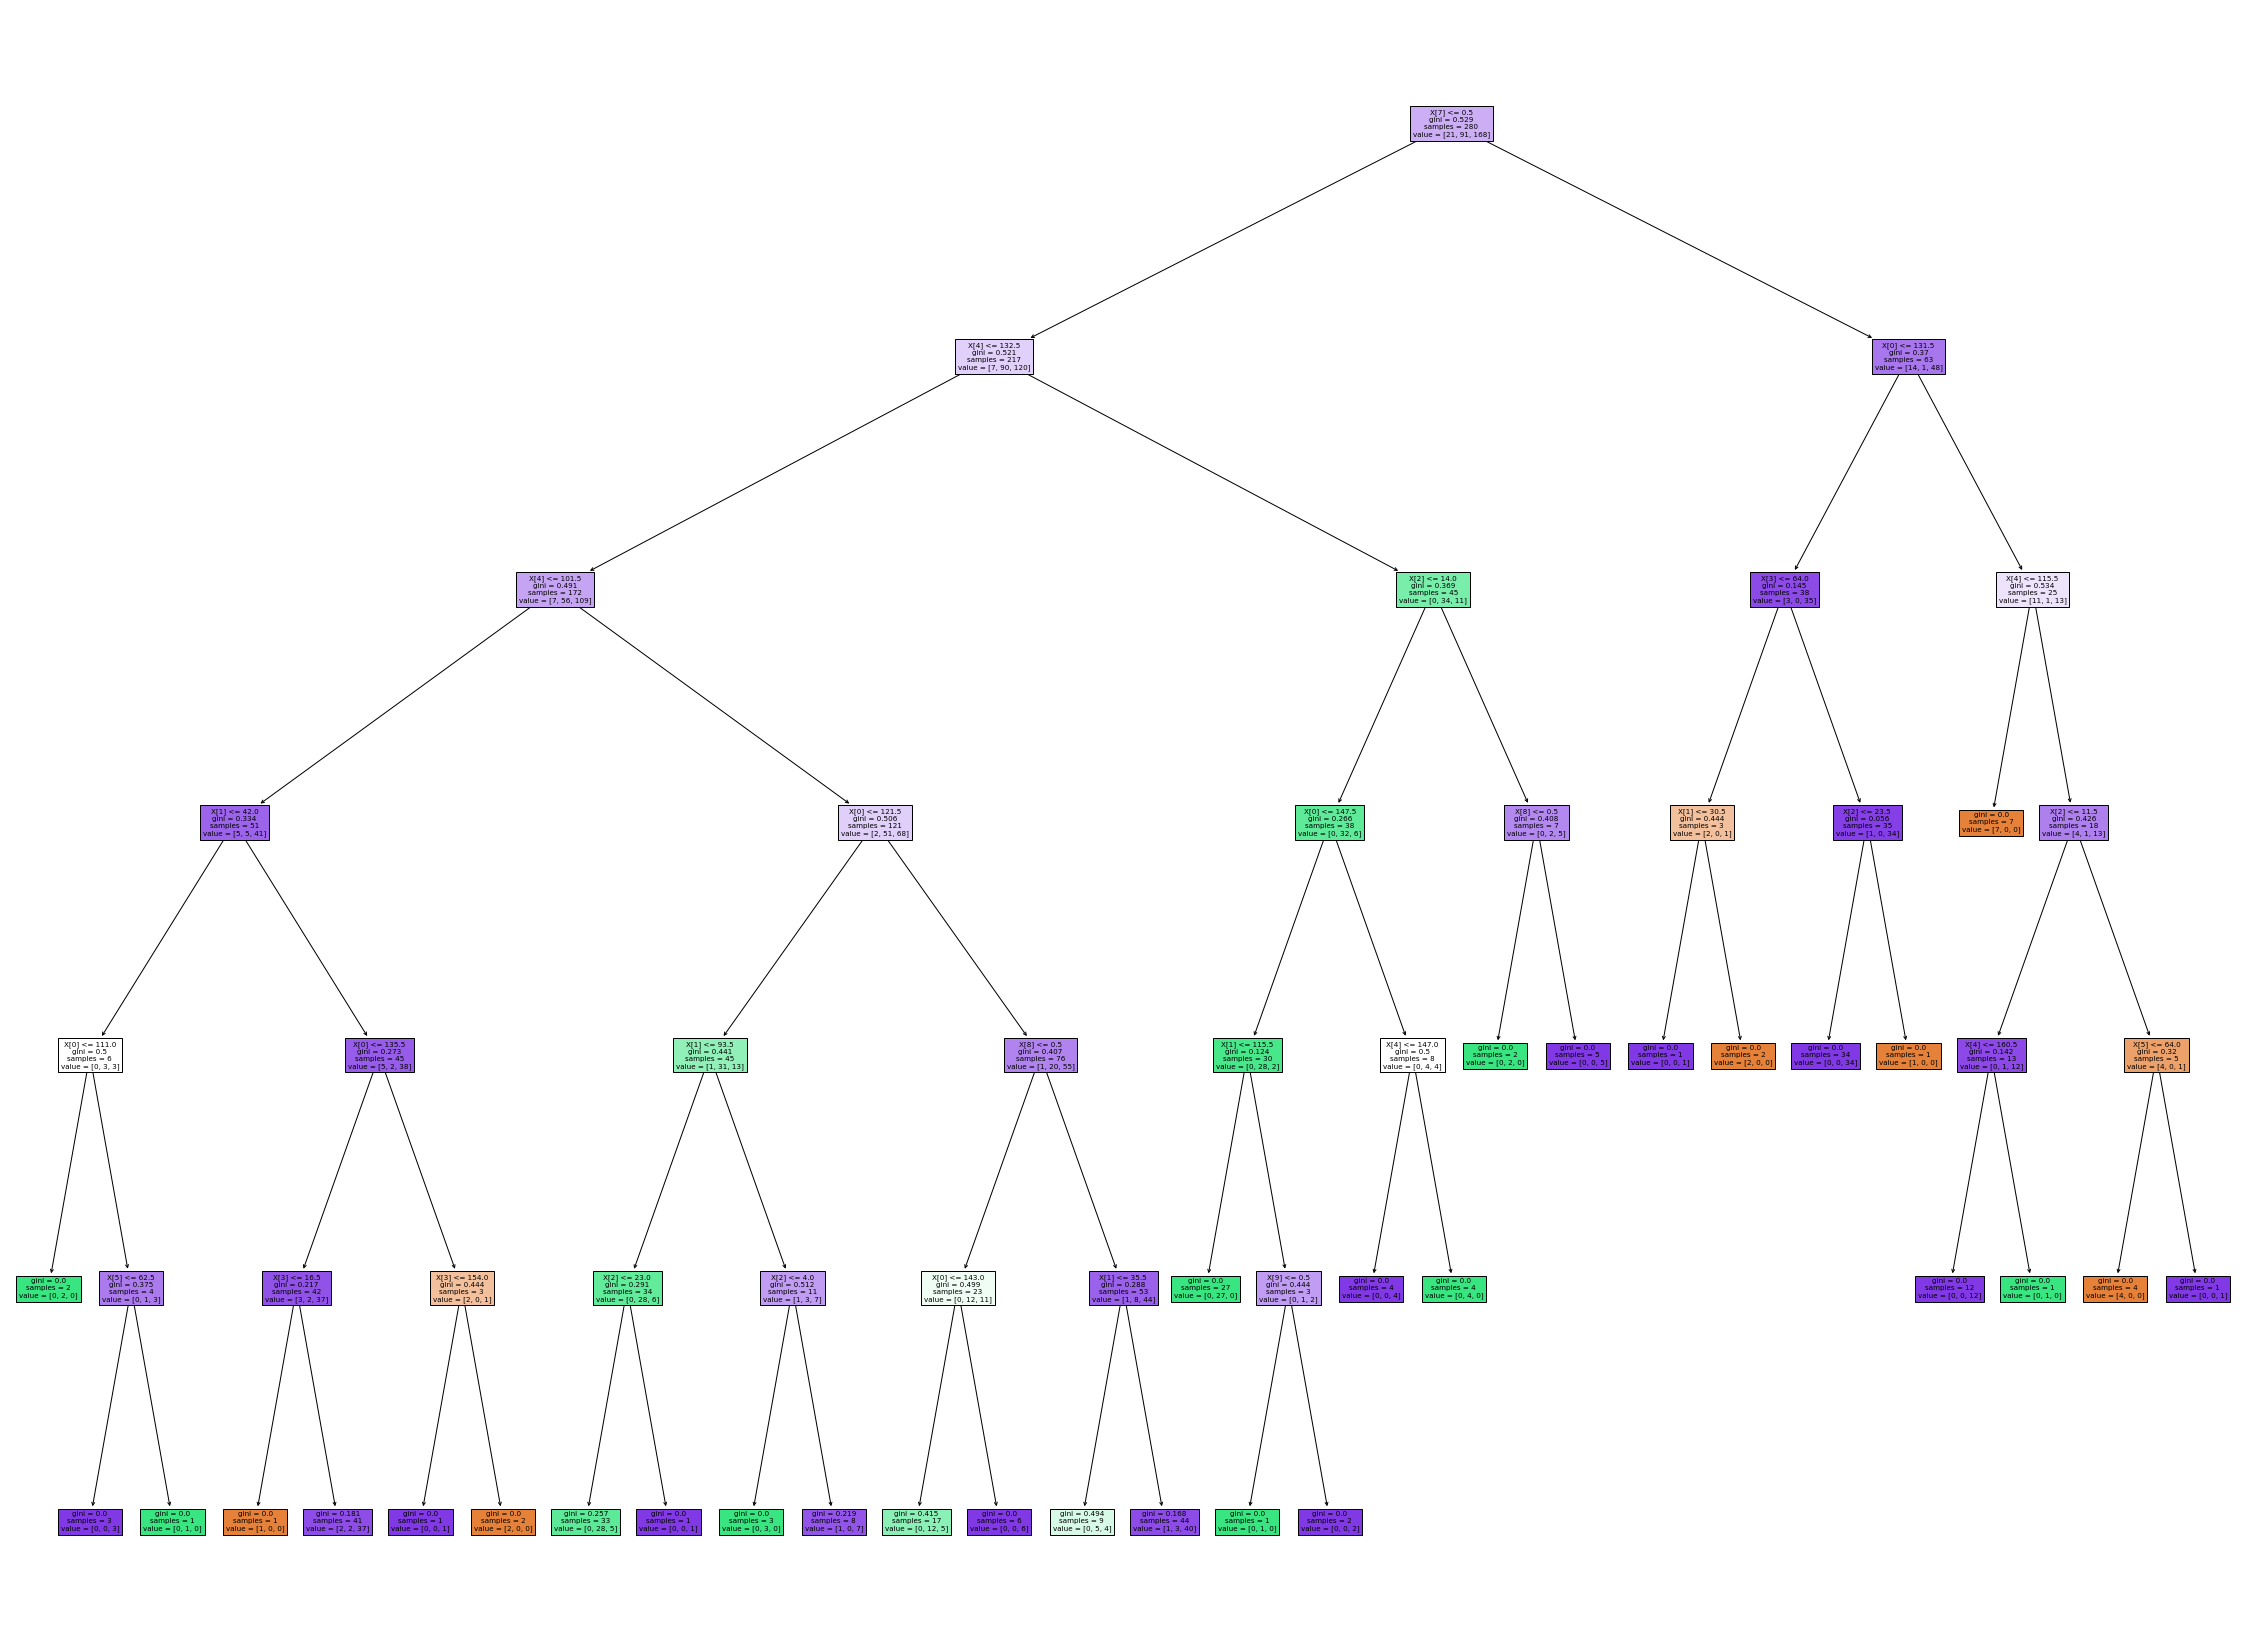

In [50]:
plt.figure(figsize=(40,30))
plot_tree(decision_tree = dt_model,filled=True,proportion=False)

plt.show()

## Training Data 

In [52]:
y_pred_train = dt_model.predict(x_train)

In [53]:
accuracy_score(y_train,y_pred_train)

0.9178571428571428

In [54]:
confusion_matrix(y_train,y_pred_train)

array([[ 17,   0,   4],
       [  0,  86,   5],
       [  0,  14, 154]], dtype=int64)

In [56]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

        High       1.00      0.81      0.89        21
         Low       0.86      0.95      0.90        91
      Medium       0.94      0.92      0.93       168

    accuracy                           0.92       280
   macro avg       0.93      0.89      0.91       280
weighted avg       0.92      0.92      0.92       280



## For Testing data

In [58]:
y_pred_test= dt_model.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_test)

0.7416666666666667

In [60]:
confusion_matrix(y_test,y_pred_test)

array([[ 1,  0,  5],
       [ 1, 30,  8],
       [ 0, 17, 58]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

        High       0.50      0.17      0.25         6
         Low       0.64      0.77      0.70        39
      Medium       0.82      0.77      0.79        75

    accuracy                           0.74       120
   macro avg       0.65      0.57      0.58       120
weighted avg       0.74      0.74      0.74       120



## 1. STANDARDIZE AND CHECK THE ACCURACY

In [79]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(x)
scaled_X

array([[ 0.85045499,  0.15536099,  0.65717702, ..., -1.09997489,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.09997489,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ...,  0.90911166,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  0.90911166,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -1.09997489,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ..., -1.09997489,
         0.64686916,  0.74188112]])

In [80]:
x_train,x_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.30,random_state=120)

In [81]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((280, 11), (280, 1), (120, 11), (120, 1))

In [82]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth = 6)

In [83]:
%%time
dt_model.fit(x_train,y_train)

Wall time: 4.99 ms


DecisionTreeClassifier(max_depth=6)

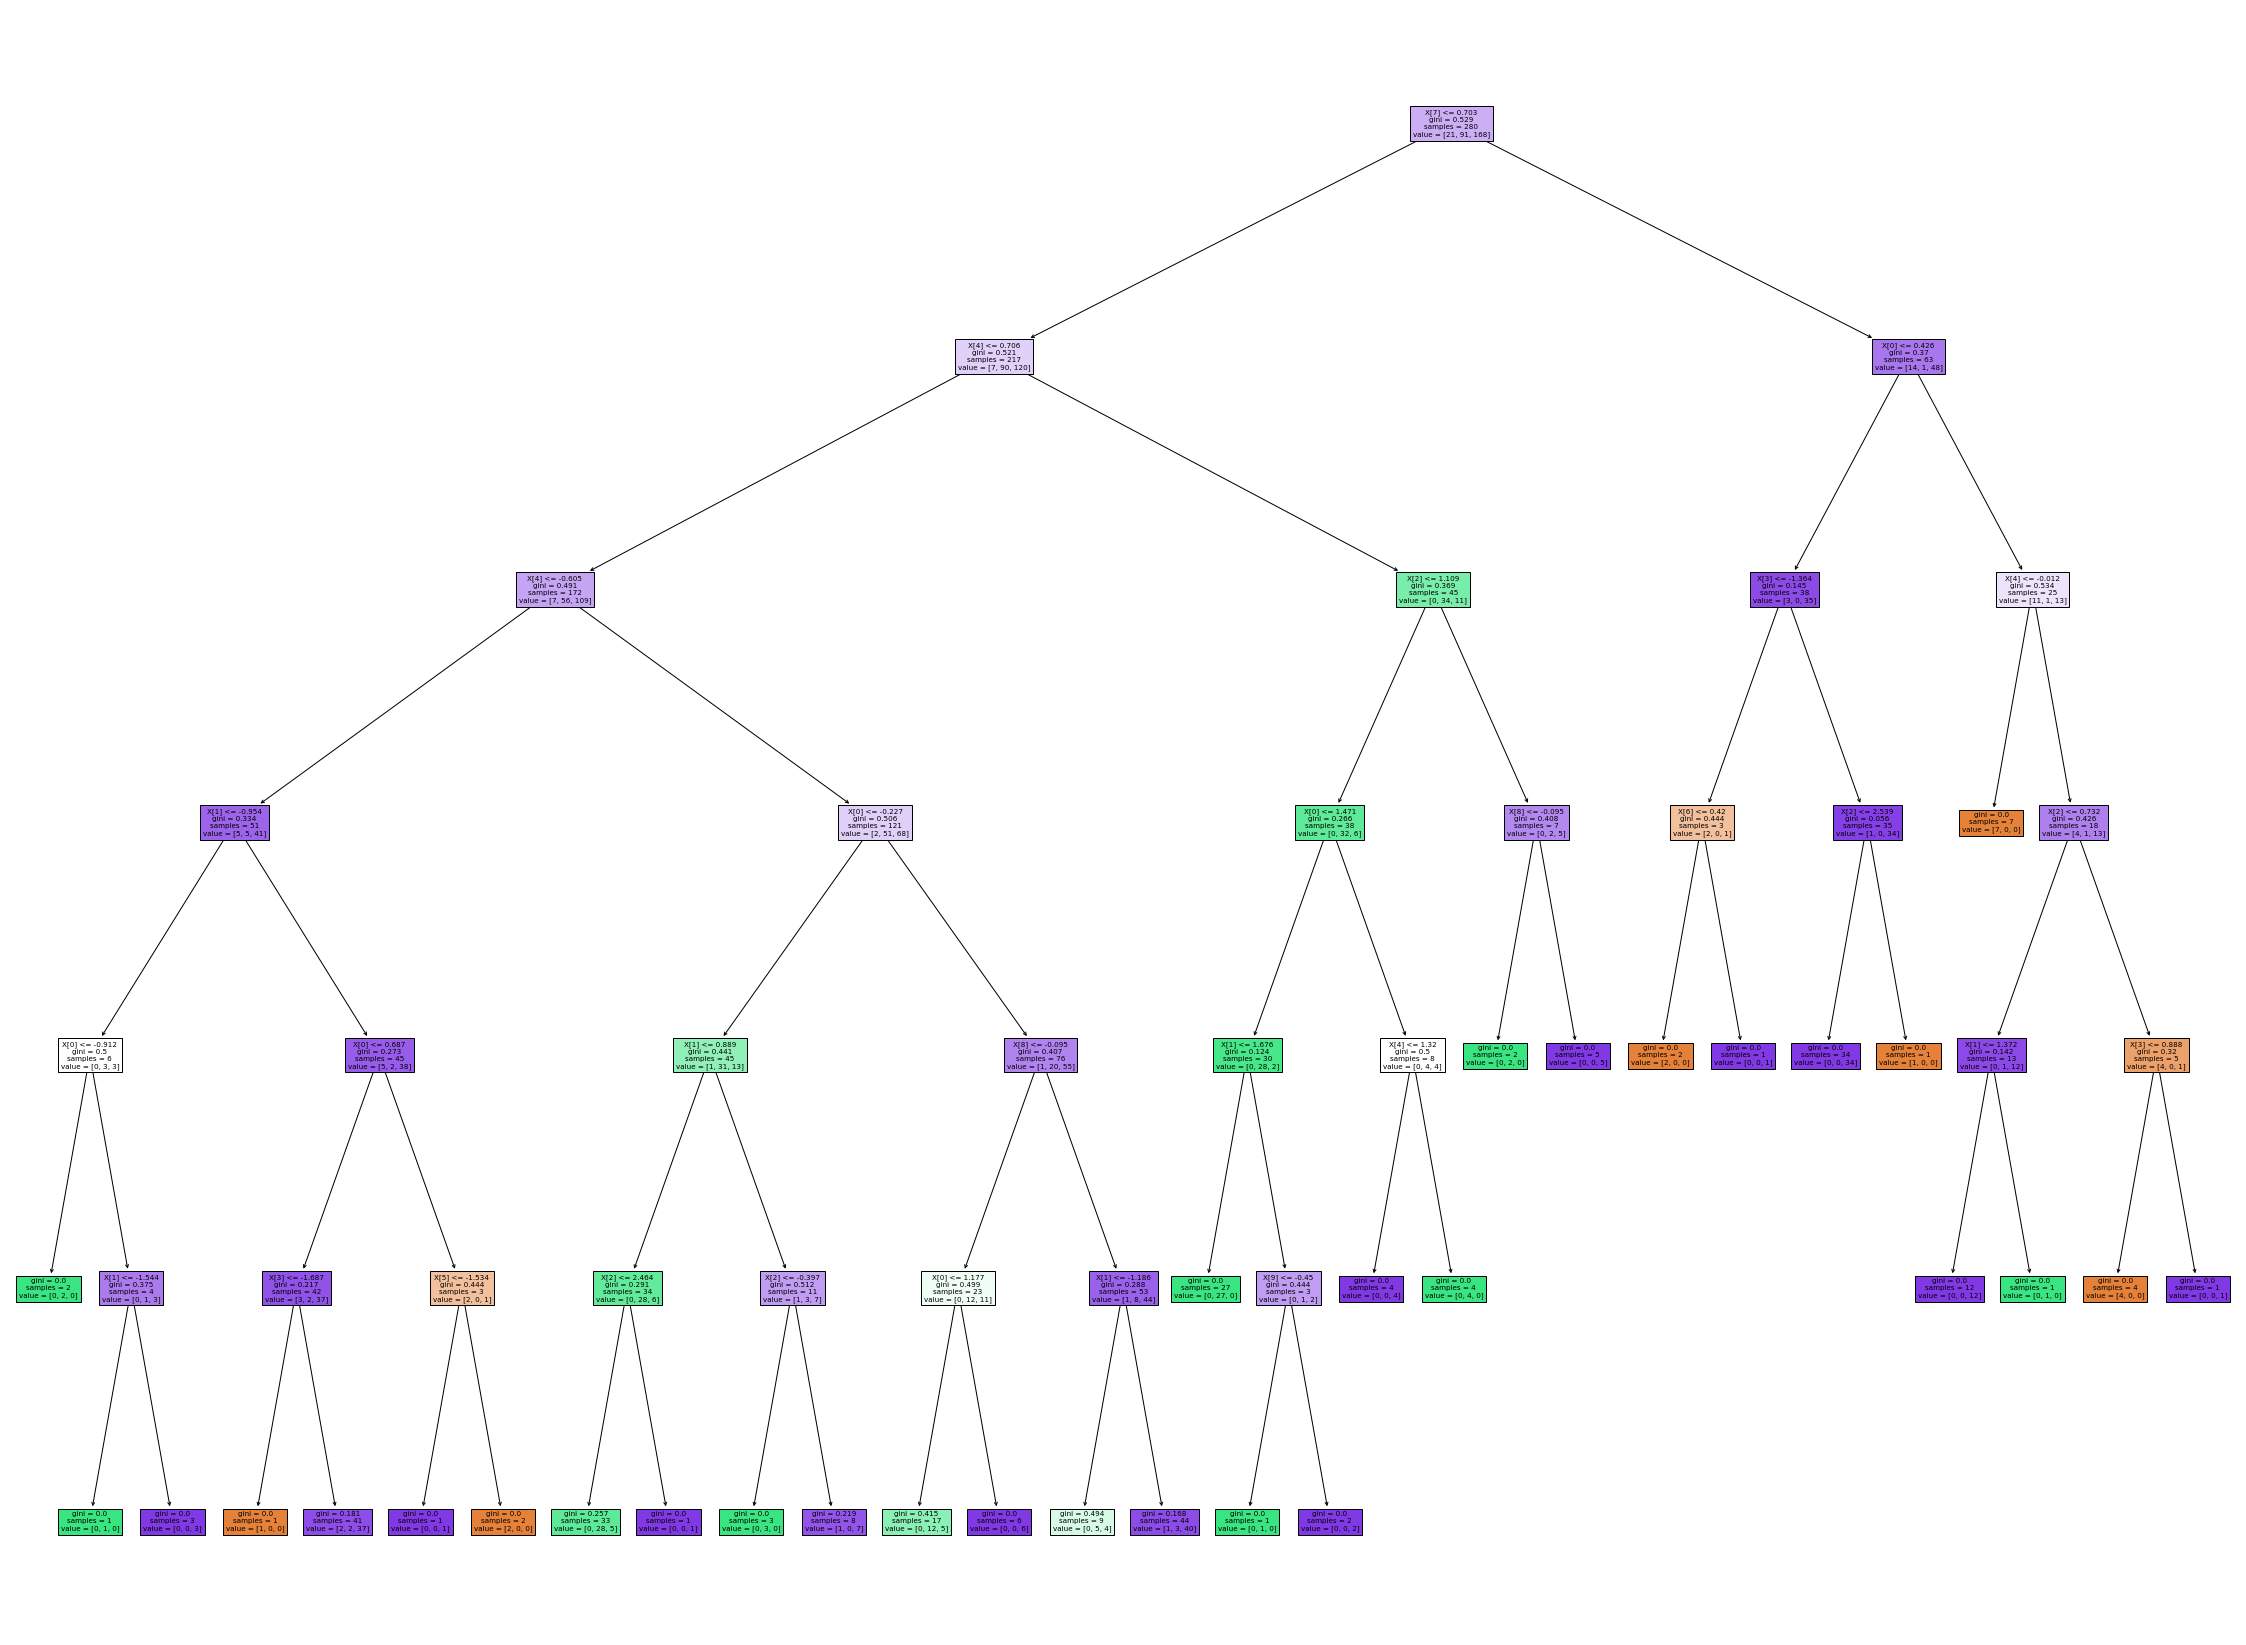

In [84]:
plt.figure(figsize=(40,30))
plot_tree(decision_tree = dt_model,filled=True,proportion=False)

plt.show()

In [85]:
## After Standarziation (Training data)

In [86]:
y_pred_train = dt_model.predict(x_train)

In [87]:
accuracy_score(y_train,y_pred_train)

0.9178571428571428

In [88]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

        High       1.00      0.81      0.89        21
         Low       0.86      0.95      0.90        91
      Medium       0.94      0.92      0.93       168

    accuracy                           0.92       280
   macro avg       0.93      0.89      0.91       280
weighted avg       0.92      0.92      0.92       280



## after Standraziation there is no change in data accuracy

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [115]:
print(model.feature_importances_).as

[0.12194835 0.11915661 0.10153496 0.0984072  0.16401772 0.10579254
 0.08588049 0.08844712 0.05050481 0.03831715 0.02599305]


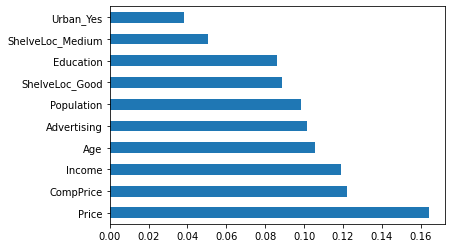

In [116]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [119]:
features = pd.DataFrame({'feature': list(x.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
features

,feature,importance
4,Price,0.164018
0,CompPrice,0.121948
1,Income,0.119157
5,Age,0.105793
2,Advertising,0.101535
3,Population,0.098407
7,ShelveLoc_Good,0.088447
6,Education,0.085880
8,ShelveLoc_Medium,0.050505
9,Urban_Yes,0.038317


## cloth manufacturing company is interested to know about the segment or attributes causes high sale:  Conclusion
## After seeing this Price have highest interest for the high sales